#### 자연어 처리
- 수집  
- 정제 및 토큰화 진행  
- 불용어 / 구두점 제거 작업  
- 단어 사전 만들기 => 토큰에 매칭되는 숫자 맵핑 진행   
- 데이터의 수치화  

[1] 모듈 로딩 및 데이터 준비 <hr>

In [2]:
# 모듈 로딩
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize




In [9]:
# 데이터 준비
TEXT_FILE = 'corpus_data.txt'

# 파일에서 데이터 추출 => 'rt' : 파일 읽기 모드
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 데이터 사이즈 읽기 read()
    text_data100=f.read(100) # 100개만 읽겠다
    f.seek(0)
    text_data=f.read() # 모두 읽겠다.

In [10]:
len(text_data), len(text_data100) 

(42053, 100)

In [20]:
# 라인단위로 읽기 => readline()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    all_data=[]
    while True:
        # 한줄 읽기 ('\n')
        text_data2=f.readline()
        if not text_data2: 
            break
        else:
            all_data.append(text_data2)

print(len(text_data2), len(all_data))
print(all_data[148])

0 149
Woodruff submits that the legal verdicts, although fair given the evidence before the courts, have not fully resolved the "great doubt" that Cockburn admitted hung over the case. Woodruff wrote in 1957: "Probably for ever, now, its key long since lost... a mystery remains".[132] A 1998 article in The Catholic Herald suggested that DNA profiling might resolve the mystery.[133] The enigma has launched numerous retellings of the story in book and film, including the short story "Tom Castro, the Implausible Imposter" from Jorge Luis Borges's Universal History of Infamy,[134] and David Yates's 1998 film The Tichborne Claimant.[135] Thus, Woodruff concludes, "the man who lost himself still walks in history, with no other name than that which the common voice of his day accorded him: the Claimant".[132][n 14]



In [24]:
# 라인 단위로 전체 읽기 => readlines()
# 라인단위로 읽기 => readline()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    text_data3=f.readlines()
        
len(text_data3), text_data3

(149,
 ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n',
  '\n',
  "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n",
  'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n',
  '\n',
  "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offerin

[2] 데이터 전처리 <hr>

- 줄바꿈 문자 (\n) 제거

In [26]:
all_text = []
for text in text_data3 :
    text=text.replace('\n', '') 
    if len(text): all_text.append(text)
print(f'all_text => {len(all_text)}개')

all_text => 87개


In [29]:
all_text=[text.lower() for text in all_text] # [] -> () == Generator 생성 for문을 써서 하나씩 빼야함
len(all_text), all_text

(87,
 ['"the tichborne claimant" redirects here. for the 1998 film, see the tichborne claimant (film).',
  "the blended image (centre) was said by the claimant's supporters to prove that roger tichborne (left, in 1853) and the claimant (right, in 1874) were one and the same person.[n 1]",
  'the tichborne case was a legal cause célèbre that fascinated victorian britain in the 1860s and 1870s. it concerned the claims by a man sometimes referred to as thomas castro or as arthur orton, but usually termed "the claimant", to be the missing heir to the tichborne baronetcy. he failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.',
  "roger tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. his mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to australia, she advertised extensively in australian newspapers, offering a reward for informat

In [31]:
all_text2=(text.lower() for text in all_text)
for _ in all_text:
    print(_)

"the tichborne claimant" redirects here. for the 1998 film, see the tichborne claimant (film).
the blended image (centre) was said by the claimant's supporters to prove that roger tichborne (left, in 1853) and the claimant (right, in 1874) were one and the same person.[n 1]
the tichborne case was a legal cause célèbre that fascinated victorian britain in the 1860s and 1870s. it concerned the claims by a man sometimes referred to as thomas castro or as arthur orton, but usually termed "the claimant", to be the missing heir to the tichborne baronetcy. he failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.
roger tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. his mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to australia, she advertised extensively in australian newspapers, offering a reward for information. in 1866, a wagga w

### 토큰화


In [32]:
all_tokens=[]
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))

In [34]:
print(f'{len(all_tokens)}개')


87개


### 불용어 & 구두점 제거

In [39]:
from nltk.corpus import stopwords
import string
eng_stopwords=stopwords.words('english')
pun = list(string.punctuation)

In [43]:
for tokenlist in all_tokens:
    for token in tokenlist[::-1]:
        if token.isnumeric():
            tokenlist.remove(token)
        elif (token in eng_stopwords) or (token in pun) or ( len(token)<=2):
            tokenlist.remove(token)
      
            
             


### 단어별 빈도수 계산 <hr>

In [44]:
token_freqs={}
for tokenlist in all_tokens:
    for token in tokenlist:
        if token not in token_freqs:
            token_freqs[token]=1
        else:
            token_freqs[token] +=1
token_freqs

{'tichborne': 97,
 'claimant': 115,
 'redirects': 1,
 'film': 4,
 'see': 1,
 'blended': 1,
 'image': 1,
 'centre': 2,
 'said': 5,
 'supporters': 8,
 'prove': 2,
 'roger': 62,
 'left': 6,
 'right': 2,
 'one': 13,
 'person': 2,
 'case': 23,
 'legal': 12,
 'cause': 3,
 'célèbre': 1,
 'fascinated': 1,
 'victorian': 1,
 'britain': 1,
 '1860s': 1,
 '1870s': 1,
 'concerned': 2,
 'claims': 2,
 'man': 4,
 'sometimes': 4,
 'referred': 1,
 'thomas': 8,
 'castro': 15,
 'arthur': 22,
 'orton': 41,
 'usually': 1,
 'termed': 1,
 'missing': 5,
 'heir': 4,
 'baronetcy': 4,
 'failed': 5,
 'convince': 3,
 'courts': 4,
 'convicted': 3,
 'perjury': 5,
 'served': 3,
 'year': 5,
 'prison': 3,
 'sentence': 4,
 'family': 32,
 'title': 3,
 'fortunes': 2,
 'presumed': 3,
 'died': 9,
 'shipwreck': 2,
 'age': 2,
 'mother': 6,
 'clung': 1,
 'belief': 3,
 'might': 6,
 'survived': 1,
 'hearing': 3,
 'rumours': 2,
 'made': 7,
 'way': 1,
 'australia': 13,
 'advertised': 1,
 'extensively': 1,
 'australian': 3,
 'newspap

In [46]:
#### 빈도별로 몇 개의 단어가 존재하는지 체크
token_freqs.items()

dict_items([('tichborne', 97), ('claimant', 115), ('redirects', 1), ('film', 4), ('see', 1), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 62), ('left', 6), ('right', 2), ('one', 13), ('person', 2), ('case', 23), ('legal', 12), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 1), ('britain', 1), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 4), ('sometimes', 4), ('referred', 1), ('thomas', 8), ('castro', 15), ('arthur', 22), ('orton', 41), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), ('baronetcy', 4), ('failed', 5), ('convince', 3), ('courts', 4), ('convicted', 3), ('perjury', 5), ('served', 3), ('year', 5), ('prison', 3), ('sentence', 4), ('family', 32), ('title', 3), ('fortunes', 2), ('presumed', 3), ('died', 9), ('shipwreck', 2), ('age', 2), ('mother', 6), ('clung', 1), ('belief', 3), ('might', 6), ('survived', 1), ('hearing', 3), ('rumours', 2), ('made', 7), ('way', 1), ('aust

In [58]:
freqsDict = {}

for k, v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v]=[k]
        freqsDict[v]=1
        freqsDict[v]=[1,[k]]
    else:
        freqsDict[v][1].append(k)
        freqsDict[v][0] +=1
print(freqsDict) # {나온횟수: [사용된단어수, ['단어']]}
print(len(token_freqs))    

{97: [1, ['tichborne']], 115: [1, ['claimant']], 1: [1054, ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', 'reigniting', 'napoleonic', 'wars', 'enemy', 'citizen', 'detained', 'hel

In [62]:
sorted(freqsDict.items())


[(1,
  [1054,
   ['redirects',
    'see',
    'blended',
    'image',
    'célèbre',
    'fascinated',
    'victorian',
    'britain',
    '1860s',
    '1870s',
    'referred',
    'usually',
    'termed',
    'clung',
    'survived',
    'way',
    'advertised',
    'extensively',
    'forward',
    'claiming',
    'manners',
    'unrefined',
    'gathered',
    'instantly',
    'dismissive',
    'protracted',
    'emerged',
    'suggesting',
    'charged',
    'gain',
    'passing',
    'condemned',
    'instigated',
    'reform',
    'championed',
    'elected',
    'independent',
    'effective',
    'parliamentarian',
    'decline',
    'dealings',
    'recant',
    'poverty',
    'view',
    'analysts',
    'believe',
    'element',
    'conceivably',
    'norman',
    'conquest',
    'reformation',
    '16th',
    'century',
    'number',
    'hanged',
    'drawn',
    'quartered',
    'complicity',
    'babington',
    'plot',
    'assassinate',
    'elizabeth',
    'loyal',
  

- [3] 단어 집합 / 단어 사전 생성  
* 단어 : 숫자 맵핑  
* 나의 데이터셋을 숫자로 변환하기 위한 인코딩(Encoding)표  
* 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업, 패딩작업  
    -패딩에 사용되는 토큰 'PAD' 값은 0  
* 테스트 검증에 입력되는 텍스트 ==> 단어사전/집합에 존재하지 않는 단어  
    -존재하지 않는 토큰 'OOV' 또는 'UNK' 키, 값 1

In [67]:
## 빈도가 높게 나오는 순서대로 단어를 정렬
sotred_token=sorted(token_freqs.items(),key=lambda x: x[1])

In [72]:
# 단어사전 생성 및 초기화
## 특수 토큰 : PAD, OOV, 또는 UNK
PAD_TOKEN, OOV_TOKEN = 'PAD', 'OOV'
vocab={PAD_TOKEN:0, OOV_TOKEN:1}

# 데이터 코퍼스에서 추출된 토큰들
for idx,tk in enumerate(sotred_token, 2) :
    vocab[tk[0]] = idx
print(vocab)


{'PAD': 0, 'OOV': 1, 'redirects': 2, 'see': 3, 'blended': 4, 'image': 5, 'célèbre': 6, 'fascinated': 7, 'victorian': 8, 'britain': 9, '1860s': 10, '1870s': 11, 'referred': 12, 'usually': 13, 'termed': 14, 'clung': 15, 'survived': 16, 'way': 17, 'advertised': 18, 'extensively': 19, 'forward': 20, 'claiming': 21, 'manners': 22, 'unrefined': 23, 'gathered': 24, 'instantly': 25, 'dismissive': 26, 'protracted': 27, 'emerged': 28, 'suggesting': 29, 'charged': 30, 'gain': 31, 'passing': 32, 'condemned': 33, 'instigated': 34, 'reform': 35, 'championed': 36, 'elected': 37, 'independent': 38, 'effective': 39, 'parliamentarian': 40, 'decline': 41, 'dealings': 42, 'recant': 43, 'poverty': 44, 'view': 45, 'analysts': 46, 'believe': 47, 'element': 48, 'conceivably': 49, 'norman': 50, 'conquest': 51, 'reformation': 52, '16th': 53, 'century': 54, 'number': 55, 'hanged': 56, 'drawn': 57, 'quartered': 58, 'complicity': 59, 'babington': 60, 'plot': 61, 'assassinate': 62, 'elizabeth': 63, 'loyal': 64, 'be

In [74]:
## 텍스트 문장 ==> 수치화 [인코딩]
encodingData=[]
for tokenlist in all_tokens:
    sent=[]
    print(f'문장 : {tokenlist}')
    for token in tokenlist:
        sent.append(vocab[token])
    encodingData.append(sent)
    print(f'==> 인코딩 : {sent}\n')
    


문장 : ['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
==> 인코딩 : [1663, 1664, 2, 1452, 3, 1663, 1664, 1452]

문장 : ['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', 'claimant', 'right', 'one', 'person']
==> 인코딩 : [4, 5, 1056, 1532, 1664, 1610, 1057, 1662, 1663, 1575, 1664, 1058, 1641, 1059]

문장 : ['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
==> 인코딩 : [1663, 1658, 1639, 1339, 6, 7, 8, 9, 10, 11, 1060, 1061, 1453, 1454, 12, 1611, 1650, 1656, 1661, 13, 14, 1664, 1533, 1455, 1663, 1456, 1534, 1340, 1457, 1341, 1535, 1342, 1536, 1343, 1458]

문장 : ['roger', 'tichborne', 'heir', '

In [81]:
dataLen=[len(sent) for sent in encodingData]
import matplotlib.pyplot as plt



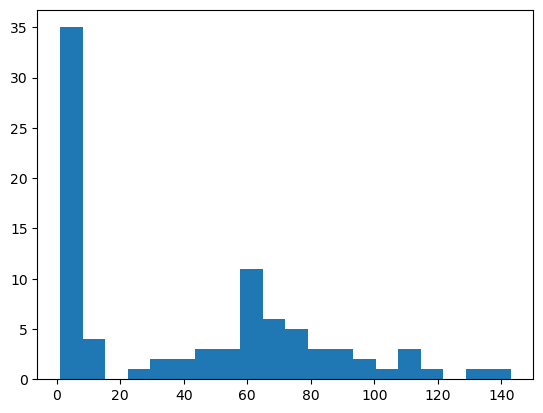

In [84]:
plt.hist(dataLen, bins=20)
plt.show()

[4] 패딩
*r길이가 다른 문장들의 길이를 일치시키기  
    - 가장 긴문장 기준으로 나머지 문장들은 PAD 토큰으로 채우기  
    - 개발자 지정 길이를 기준으로 문장들의 길이를 조절  
        * 지정 길이보다 긴 경우 : 자르기 (앞부분/뒷부분 중 선택)  
        * 지정 길이보다 짧은 경우 : 채우기

In [87]:
## 기준 길이 설정
MAX_LEN = max(dataLen)
for idx,sent in enumerate(encodingData):
    cur_len = len(sent)
    if cur_len < MAX_LEN:
        encodingData[idx]=sent+([0]*(MAX_LEN-cur_len))
    

In [88]:
for _ in encodingData[:3]:
    print(len(_), _)
    

143 [1663, 1664, 2, 1452, 3, 1663, 1664, 1452, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [4, 5, 1056, 1532, 1664, 1610, 1057, 1662, 1663, 1575, 1664, 1058, 1641, 1059, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [1663, 1658, 1639, 1339, 6, 7, 8, 9, 10, 11, 1060, 1061, 1453, 1454, 12, 1

In [89]:
MAX_LEN = 100

In [91]:
### 가장 긴 문장 길이 기준
for idx,sent in enumerate(encodingData):
    cur_len = len(sent)
    if cur_len < MAX_LEN:
        encodingData[idx]=sent+([0]*(MAX_LEN-cur_len))
    else:
        encodingData[idx]=sent[cur_len-MAX_LEN : ]
        encodingData[idx]=sent[:MAX_LEN]